# character based model applied in abt_buy dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
abt_train = pd.read_csv("buy_train.tsv", sep="\t")
abt_train

,idx,text_left,text_right,label
0,0,lg 24 ' lds4821ww semi integrated built in whi...,lg ldf6920bb fully integrated dishwasher,0
1,1,speck seethru clear hard shell case for macboo...,speck products seethru case for apple 13 ' mac...,0
2,2,denon blu-ray disc dvd/cd player dvd3800bdci 1...,denon dvd-2930ci dvd player dvd2930ci dvd + rw...,0
3,3,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg1032s dual handset digital cord...,0
4,4,sony silver minidv handycam camcorder dcrhc52 ...,sony minidv head cleaner dvm12cld head cleaner,0
...,...,...,...,...
5738,5738,sony silver cyber-shot digital camera dscw170 ...,sony cyber-shot dsc-w300 digital camera 13.6 m...,0
5739,5739,panasonic nnsd377s stainless steel countertop ...,panasonic nn-c994s genius prestige convection ...,0
5740,5740,omnimount 42 ' 63 ' wishbone cantilever extra ...,sanus visionmount flat panel tv wall mount mf1...,0
5741,5741,samsung black dvd/vhs combo recorder dvdvr375 ...,samsung dvd-v9800 dvd/vcr combo player w / 108...,0


In [3]:
train_left=abt_train['text_left']
train_right=abt_train['text_right']

In [4]:
length=len(train_left)

In [5]:
# build a function to calculate Levenshtein minimal-editing distance
def charDistance(s1,s2):
    # get the length of the strings
    m = len(s1)
    n = len(s2)
    # if some of them are empty, return the longer length of them
    if (m==0|n==0):
        return max(m,n)
    # create an empty matrix to store the calculation result
    A = np.zeros((m+1,n+1))
    # initialize the first row and column
    for i in range(0,m+1):
        A[i][0]=i
    for j in range(1,n+1):
        A[0][j]=j
    # calculate the distance column by column
    for j in range(1,n+1):
        for i in range(1,m+1):
            if (s1[i-1]==s2[j-1]):
                d=0
            else: d=1
            A[i][j]=min(A[i-1][j]+1,A[i][j-1]+1,A[i-1][j-1]+d)
    # return the final result
    return A[m][n]

In [6]:
dist_train=[]
for i in range(length):
    d=charDistance(train_left[i],train_right[i])
    dist_train.append(d)
# dist_train

In [7]:
real_train=abt_train['label']

In [8]:
is_same=[]
is_diff=[]
for i in range(length):
    if real_train[i]==1:
        is_same.append(dist_train[i])
    else:
        is_diff.append(dist_train[i])

In [9]:
print(np.mean(is_same))
print(np.mean(is_diff))

179.9707792207792
202.20967427345425


In [10]:
print(max(is_same))
print(max(is_diff))

423.0
460.0


In [11]:
set_same=set(is_same)
set_diff=set(is_diff)

In [12]:
def countnum(A,a):
    count=0
    for i in range(len(A)):
        if(A[i]==a):
            count=count+1
    return count

In [13]:
y_same=[]
for i in set_same:
    y_same.append(countnum(is_same,i))

In [14]:
y_diff=[]
for i in set_diff:
    y_diff.append(countnum(is_diff,i))

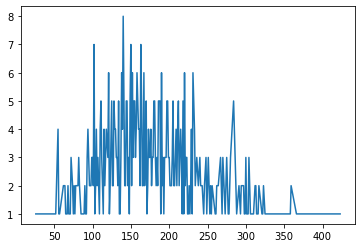

In [15]:
import matplotlib.pyplot as plt
plt.plot(list(set_same),y_same)

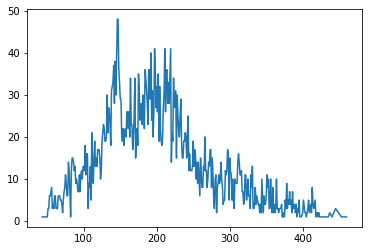

In [16]:
plt.plot(list(set_diff),y_diff)

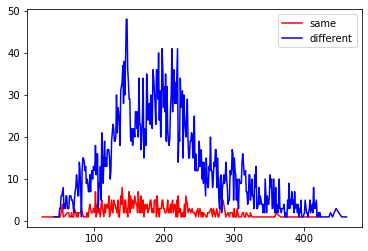

In [17]:
plt.plot(list(set_same),y_same,color='r',label='same')
plt.plot(list(set_diff),y_diff,color='b',label='different')
plt.legend()

In [18]:
threshold=range(50,200,2)

In [19]:
abt_test = pd.read_csv("buy_test.tsv", sep="\t")
abt_test

,idx,text_left,text_right,label
0,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540 8 me...,0
1,1,lg 2.0 cu . ft. over-the-range white microwave...,maytag 2.0 cu . ft. over-the-range microwave oven,0
2,2,panasonic black 8.5 ' portable dvd player dvdl...,toshiba sd-p71s portable dvd player toshiba sd...,0
3,3,sony bravia theater black micro system davis50...,sony bravia dav-is50 / b home theater system d...,1
4,4,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg9342t cordless phone 1 x phone ...,0
...,...,...,...,...
1911,1911,nikon coolpix s210 plum 8.1 megapixels compact...,nikon coolpix s610 digital camera midnight bla...,0
1912,1912,lg 2.0 cu . ft. over-the-range black microwave...,lg 2.0 cu.ft . over the range microwave oven,1
1913,1913,lg dlex7177rm cherry red xl capacity electric ...,lgs new electric steamdryer,0
1914,1914,sanus 15 ' to 40 ' flat panel black tv wall mo...,omnimount ultra low profile ulpt-l flat panel ...,0


In [20]:
test_left=abt_test['text_left']
test_right=abt_test['text_right']

In [21]:
length_test=len(test_left)

In [22]:
dist_test=[]
for i in range(length_test):
    d=charDistance(test_left[i],test_right[i])
    dist_test.append(d)

In [23]:
test_label=aby_test['label']

In [24]:
accuracy=[]
for i in range(len(threshold)):
    predict=[]
    for j in range(len(dist_test)):
        if dist_test[j]<=threshold[i]:
            predict.append(1)
        else:
            predict.append(0)
    count=0
    for k in range(len(dist_test)):
        if predict[k]==test_label[k]:
            count=count+1
    a=count/len(test_label)
    accuracy.append(a)  

In [25]:
accuracy

[0.8919624217118998,
 0.8914405010438413,
 0.8909185803757829,
 0.8893528183716075,
 0.8877870563674322,
 0.8836116910229646,
 0.8825678496868476,
 0.8825678496868476,
 0.8810020876826722,
 0.8789144050104384,
 0.877348643006263,
 0.877348643006263,
 0.8763048016701461,
 0.8747390396659708,
 0.8705636743215032,
 0.8679540709812108,
 0.8669102296450939,
 0.8648225469728601,
 0.8590814196242171,
 0.8569937369519833,
 0.8549060542797495,
 0.8502087682672234,
 0.8481210855949896,
 0.8444676409185804,
 0.8397703549060542,
 0.8355949895615866,
 0.8345511482254697,
 0.8324634655532359,
 0.8293319415448852,
 0.826722338204593,
 0.8235908141962421,
 0.8215031315240083,
 0.8152400835073069,
 0.8157620041753654,
 0.8105427974947808,
 0.8032359081419624,
 0.8001043841336117,
 0.7974947807933194,
 0.7922755741127349,
 0.7896659707724426,
 0.7828810020876826,
 0.7750521920668059,
 0.7640918580375783,
 0.7578288100208769,
 0.7489561586638831,
 0.7437369519832986,
 0.7390396659707724,
 0.7239039665970

In [26]:
max(accuracy)

0.8919624217118998